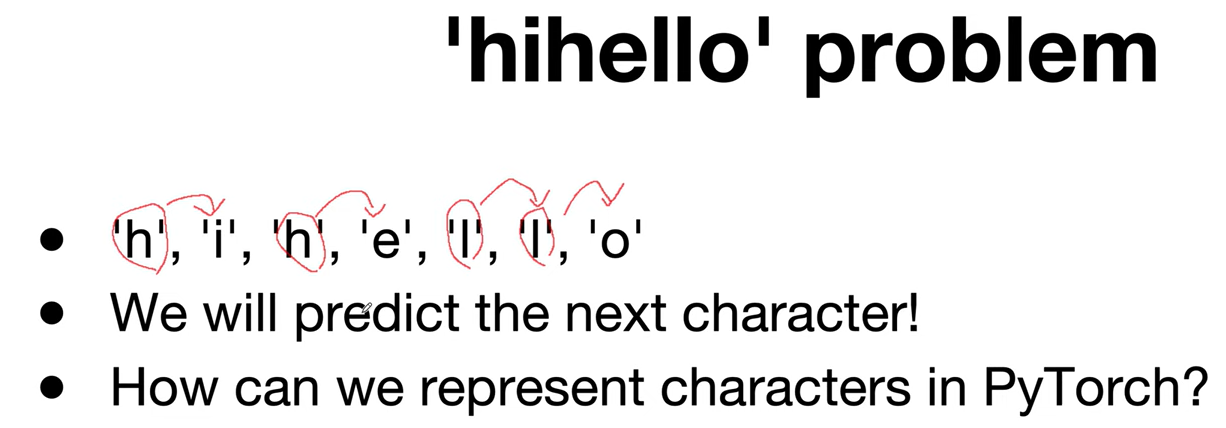

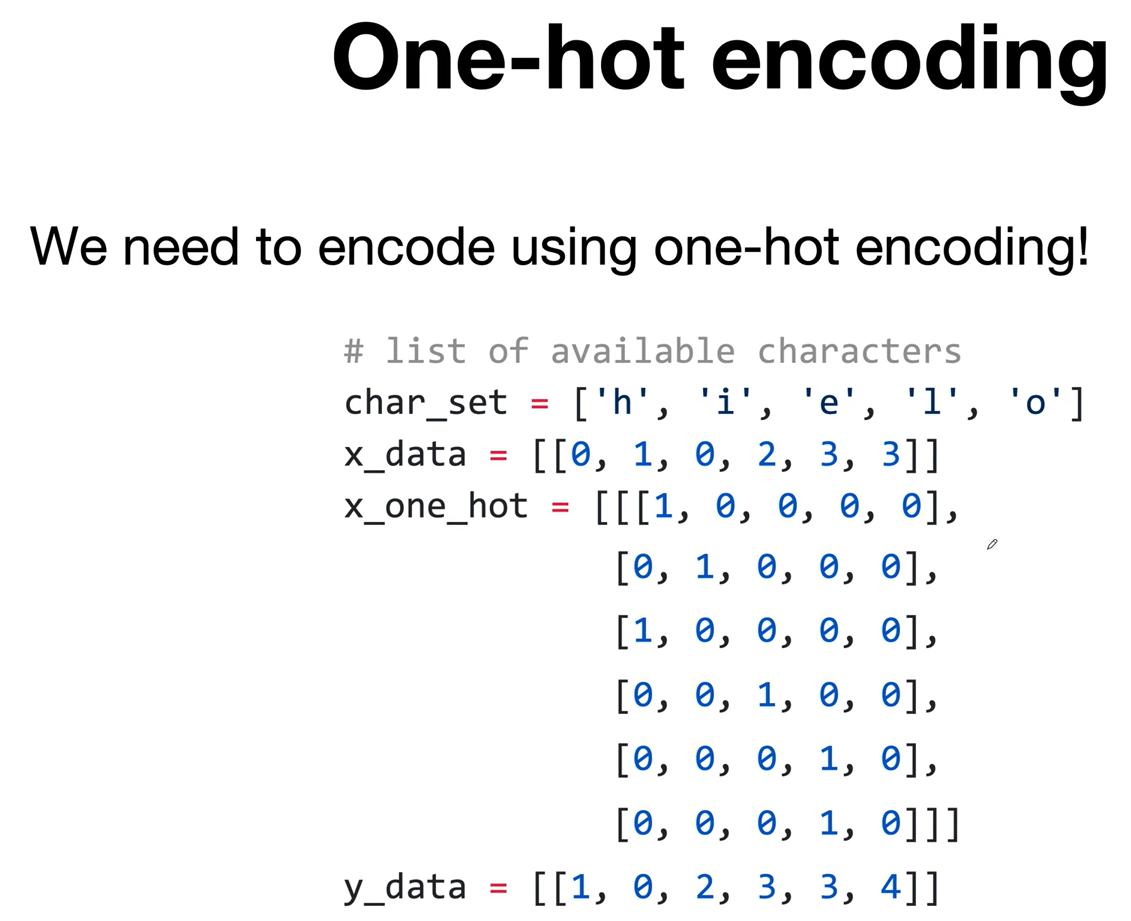

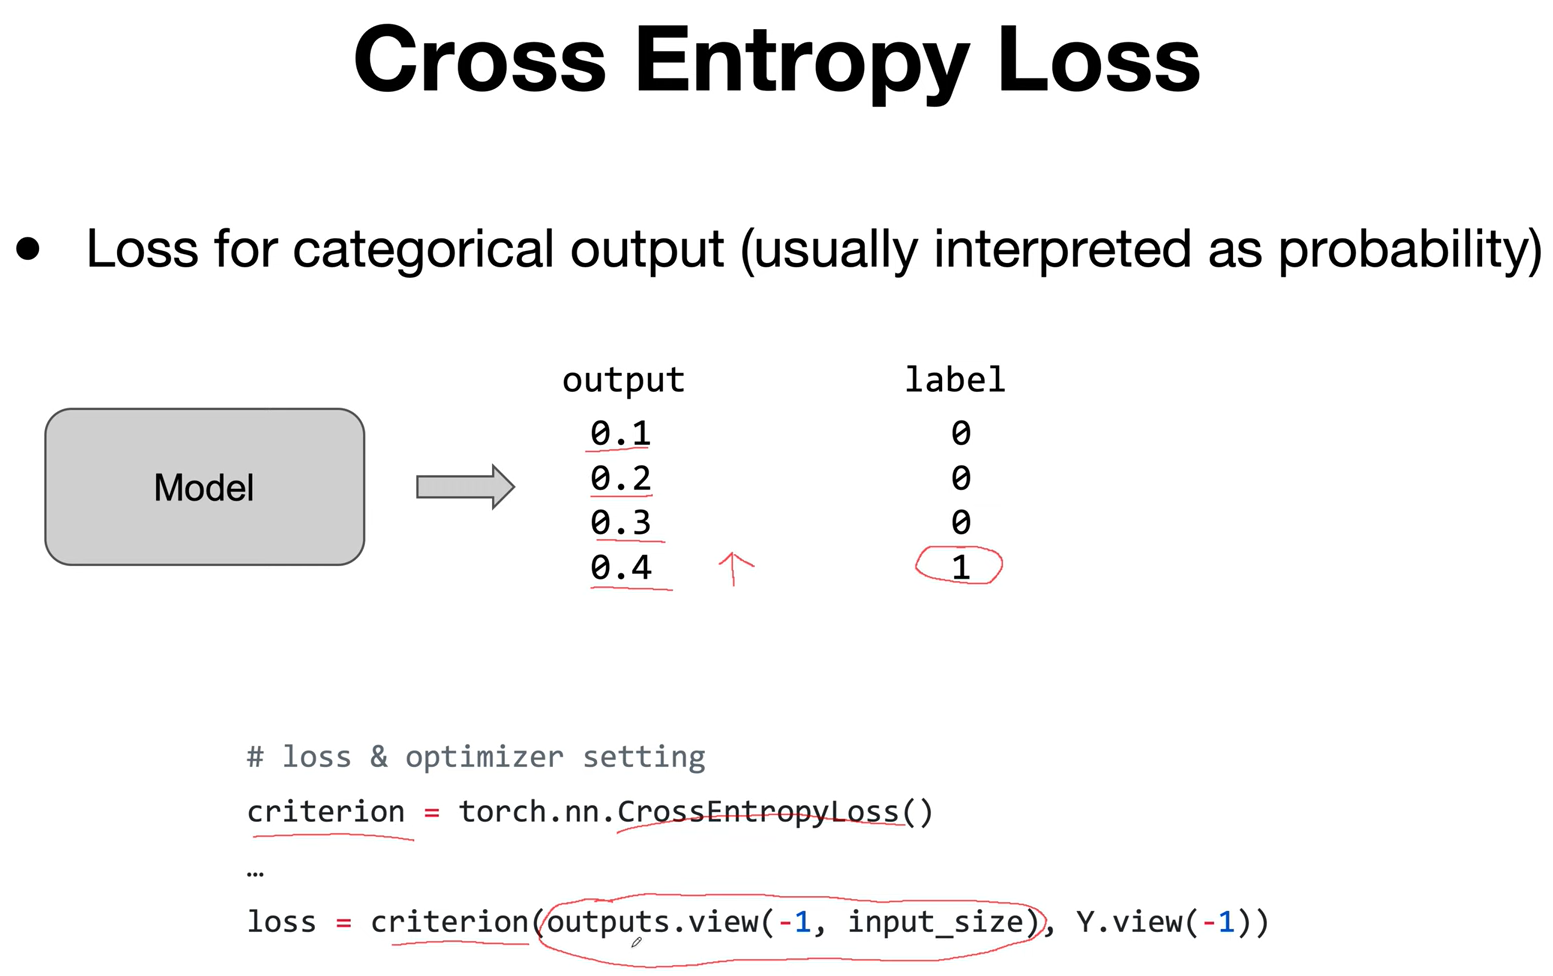

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
#declare dictionary
char_set = ['h', 'i', 'e', 'l', 'o']

In [4]:
#hyper parameters
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

In [6]:
#data setting
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]
y_data = [[1, 0, 2, 3, 3, 4]]

In [7]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [8]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # batch_first guarantees the order of output = (B, S, F)

In [9]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [10]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.7802648544311523 prediction:  [[1 1 1 1 1 1]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  iiiiii
1 loss:  1.4931949377059937 prediction:  [[1 4 1 1 4 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ioiioo
2 loss:  1.3337111473083496 prediction:  [[1 3 2 3 1 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ilelio
3 loss:  1.2152944803237915 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelll
4 loss:  1.1131387948989868 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelll
5 loss:  1.024186372756958 prediction:  [[2 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elello
6 loss:  0.9573140740394592 prediction:  [[2 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elello
7 loss:  0.9102001190185547 prediction:  [[2 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ehello
8 loss:  0.8731765747070312 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
9 